# 1-  `Quantitative comparisons`
- Bar
- histograms
- staistical plotting
    - bar plot
    - errorbar plot
    - box plot
- scatter 

In [2]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing course datasets as DataFrames
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

## Olympic medals: visualizing the data

In [4]:
medals.head() # Display the first five rows of this DataFrame

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


- By observing the above table it is quite **hectic to see which country won which medal**.

## a) Quantitative comparisons **`.bar()`**

<BarContainer object of 10 artists>

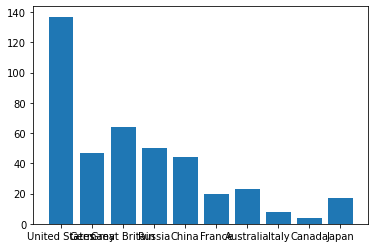

In [5]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])

### Interlude: rotate the tick labels

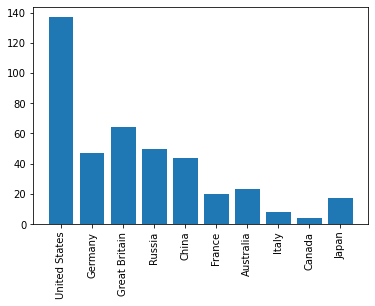

In [6]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

### Olympic medals: visualizing the other medals

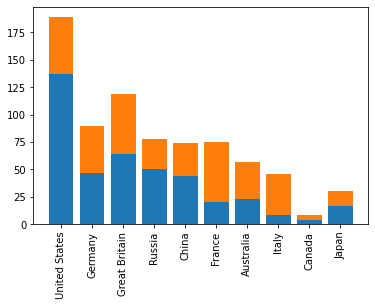

In [7]:
fig, ax = plt.subplots()

ax.bar(medals.index, medals['Gold'])
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'])
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

### Olympic medals: visualizing all three
- full stacked bar chart

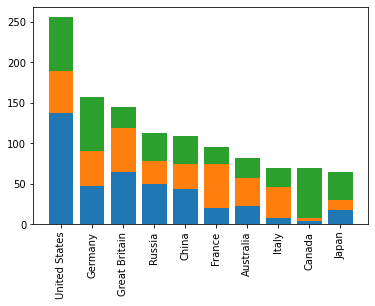

In [8]:
fig, ax= plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'])
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'])
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

### Adding a legend

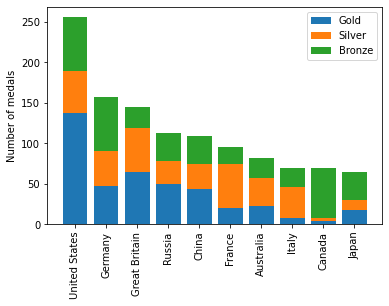

In [9]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'], label='Gold')
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')
ax.bar(medals.index, medals['Bronze'], bottom= medals['Gold'] + medals['Silver'], label='Bronze')
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel('Number of medals')
plt.legend()
plt.show()

## b) Quantitative comparisons `.histograms()`

In [10]:
summer_2016.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [11]:
summer_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2014 non-null   int64  
 1   ID          2014 non-null   int64  
 2   Name        2014 non-null   object 
 3   Sex         2014 non-null   object 
 4   Age         2014 non-null   float64
 5   Height      2014 non-null   float64
 6   Weight      2014 non-null   float64
 7   Team        2014 non-null   object 
 8   NOC         2014 non-null   object 
 9   Games       2014 non-null   object 
 10  Year        2014 non-null   int64  
 11  Season      2014 non-null   object 
 12  City        2014 non-null   object 
 13  Sport       2014 non-null   object 
 14  Event       2014 non-null   object 
 15  Medal       2014 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 251.9+ KB


In [12]:
mens_rowing = summer_2016[summer_2016.Sport == "Rowing"]
mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
10,1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
52,6598,3691,Anne Dsane Andersen,F,23.0,183.0,86.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
89,14103,7612,Carina Br,F,26.0,185.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Gold


In [13]:
mens_gymnastics = summer_2016[summer_2016.Sport == 'Gymnastics']
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


### A bar chat again
problem is that bar chat didn't hspow us the distribution that's why we used histogram 

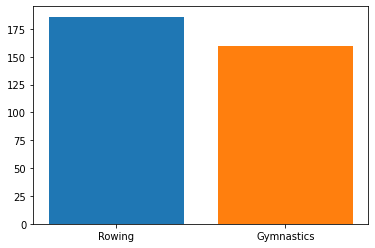

In [14]:
fig, ax = plt.subplots()
ax.bar("Rowing", summer_2016['Height'][summer_2016.Sport == 'Rowing'].mean())
ax.bar("Gymnastics", summer_2016['Height'][summer_2016.Sport == 'Gymnastics'].mean())
plt.show()

### Introducing histograms

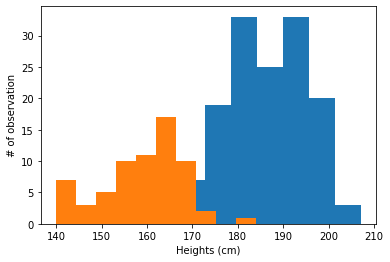

In [15]:
fig, ax= plt.subplots()
ax.hist(mens_rowing['Height'])
ax.hist(mens_gymnastics['Height'])
ax.set_xlabel('Heights (cm)')
ax.set_ylabel('# of observation')
plt.show()

### Labels are needed

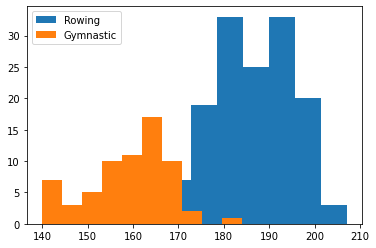

In [16]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label= 'Rowing')
ax.hist(mens_gymnastics['Height'], label= 'Gymnastic')
ax.legend()
plt.show()

### Customizing histograms: setting the number of bins

- Now you will think how matplotlib will divide the bins ?

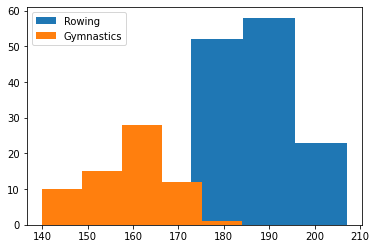

In [17]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label="Rowing", bins= 5) # bins tells us the size of bins byu default bin size is 10
ax.hist(mens_gymnastics['Height'], label='Gymnastics', bins=5)
ax.legend()
plt.show()

### Customizing histograms: setting bin boundaries

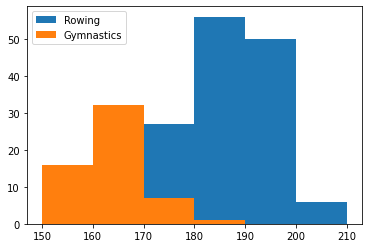

In [18]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label='Rowing', bins=[150, 160, 170, 180, 190, 200, 210])
ax.hist(mens_gymnastics['Height'], label="Gymnastics", bins=[150, 160, 170, 180, 190, 200, 210])
ax.legend()
plt.show()

### Customizing histograms: transparency

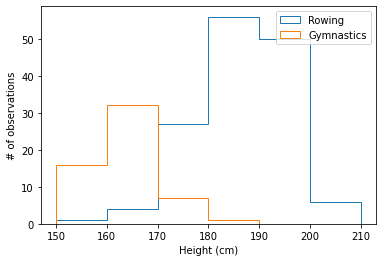

In [19]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label='Rowing', bins=[150, 160, 170, 180, 190, 200, 210], histtype='step')
ax.hist(mens_gymnastics['Height'], label='Gymnastics', bins=[150, 160, 170, 180, 190, 200, 210], histtype='step')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

## c) `Statistical plotting`
- bar

There are two methods to plot error .
- Errorbar
        - error bar as argument
        - error plot
- boxplot

#### i) Adding error bars to `bar` charts

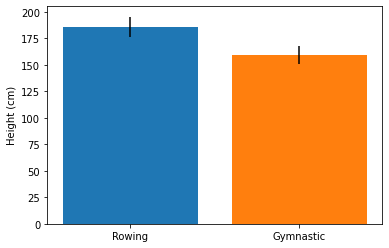

In [20]:
fig, ax = plt.subplots()
ax.bar('Rowing', mens_rowing['Height'].mean(), yerr= mens_rowing['Height'].std())
ax.bar("Gymnastic", mens_gymnastics['Height'].mean(), yerr= mens_gymnastics['Height'].std())
ax.set_ylabel("Height (cm)")
plt.show()

#### ii) Adding `error bars` to plots

In [21]:
seattle_weather.head(2)

,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH
DATE,,,,,,,,,,,,,,,,,,,,,
1,USW00094290,"SEATTLE SAND PT WSFO, WA US",27.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,37.0,64.0,129.0,317.0,709.0,959.0,1000.0,2.3,Jan
2,USW00094290,"SEATTLE SAND PT WSFO, WA US",31.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,...,280.0,36.9,15.0,76.0,273.0,616.0,917.0,1000.0,2.6,Feb


In [22]:
austin_weather.head(2)

,STATION,NAME,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,MONTH
DATE,,,,,,,,,,,,,,,,,,,,,
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",190,103,50,35,18,1,-7777,5,...,310,36.3,298,570,839,967,997,1000,2.9,Jan
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",228,132,68,49,29,3,1,11,...,280,39.4,103,327,614,867,973,999,3.2,Feb


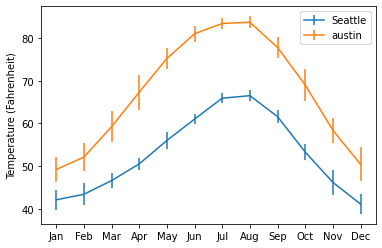

In [27]:
fig, ax = plt.subplots()

ax.errorbar(seattle_weather['MONTH'],
            seattle_weather['MLY-TAVG-NORMAL'],
            yerr=seattle_weather['MLY-TMIN-STDDEV'], label='Seattle')

ax.errorbar(austin_weather['MONTH'],
            austin_weather['MLY-TAVG-NORMAL'],
            yerr= austin_weather['MLY-TMIN-STDDEV'], label='austin')

ax.set_ylabel("Temperature (Fahrenheit)")
plt.legend()
plt.show()

#### iii) Adding `.boxplots()`
- invented by John Tuky, argubly first Data Scientist.
- Take list of x & y columns.
- B/C Doesn't know variables, we have to seperately gives the labels.


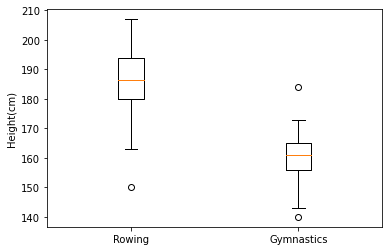

In [24]:
fig, ax = plt.subplots()
ax.boxplot( [mens_rowing["Height"], mens_gymnastics['Height']])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height(cm)')
plt.show()

- Red line Indicates the `median height`.
- The edges of the box portion at the `center  indicates the inter-quartile` range of the data B/W 25 to 75 percentile.
- The `wiskers` at the end of the `thin bar` one & half times the size the of inter quartile range  beyond  the 75th & 25th percentile.
- This should encompass roughly 99% distribution of data if data is guassion or normal.
- Points that are should beyong the wiskers are `outliers`.

### d) Quantitativ comparisons `.scatter plots()`
- Bar charts shows values of one variable accross different conditions.

##### What we'll do when we have Different Variables & Different Conditions ?

- Use for bi-variate comparsion.
- B/C it involve comparsion of two different values.
- best choise for Bi-variate comparison is `scatter plot`

In [63]:
print(climate_change.shape)
climate_change.head()

(706, 2)


,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


### Introducing scatter plots

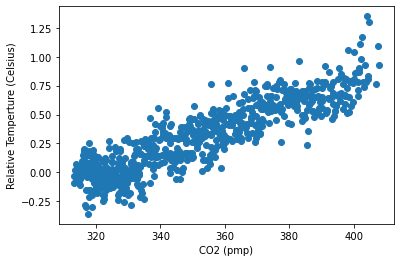

In [64]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel('CO2 (pmp)')
ax.set_ylabel('Relative Temperture (Celsius)')
plt.show()

### Customizing scatter plots

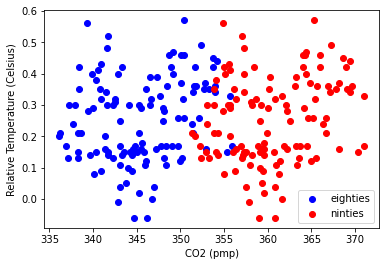

In [65]:
eighties = climate_change['1980-01-01' : '1989-12-31']
ninties = climate_change['1990-01-01' : '1999-12-31']

fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='blue', label='eighties')
ax.scatter(ninties['co2'], eighties['relative_temp'], color='red', label='ninties')
ax.set_xlabel('CO2 (pmp)')
ax.set_ylabel('Relative Temperature (Celsius)')
plt.legend()
plt.show()

### Encoding a third variable by color
- contiuous variable time stored as DataFrame in index 
- if we put this index as argument into scatter plot as `c` this will encoded as color.
- Note: this is not the color key-word argument, just a letter `c`.

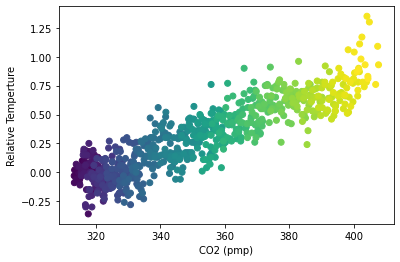

In [66]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)
ax.set_xlabel('CO2 (pmp)')
ax.set_ylabel('Relative Temperture')
plt.show()

# Practise

### Bar chart

In [69]:
# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

### Stacked bar chart

In [70]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index,
         medals['Bronze'],
         bottom=medals['Gold'] + medals['Silver'], 
         label='Bronze')

# Display the legend
ax.legend()

plt.show()

### Craeting a histogram

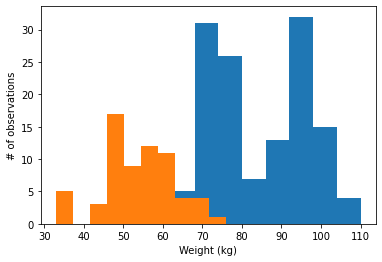

In [71]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

### "step" histogram

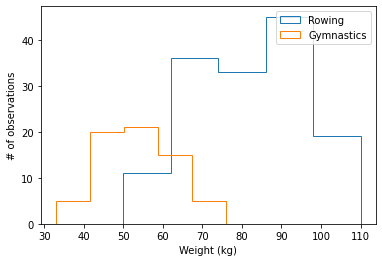

In [72]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype= 'step', bins=5, label='Rowing')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype= 'step', bins=5, label='Gymnastics')

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Adding error-bars to a bar chart

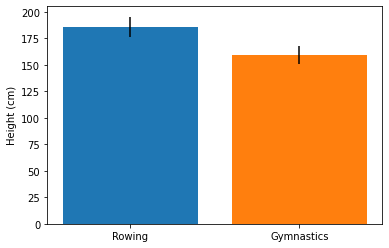

In [73]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot

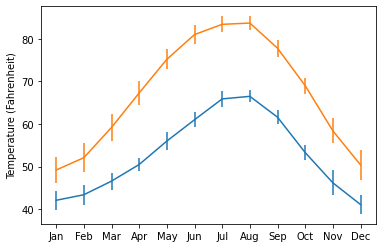

In [74]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

### creating boxplot

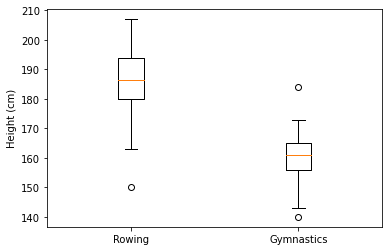

In [75]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

### Relative temperature (C)

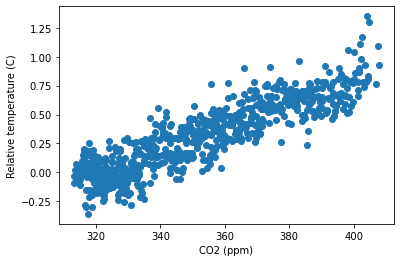

In [76]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

### Encoding time by color

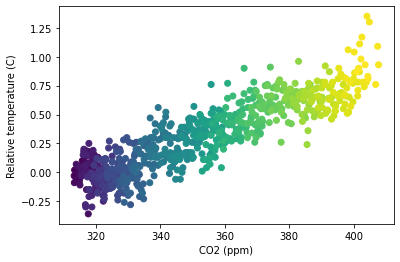

In [77]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

## Thank you :)